In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
#Load the data set
data = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
data.shape

(1436, 11)

In [6]:
# Display information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [7]:
# Summary statistics for numerical features
print(data.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [8]:
# Feature types
print(data.dtypes)

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


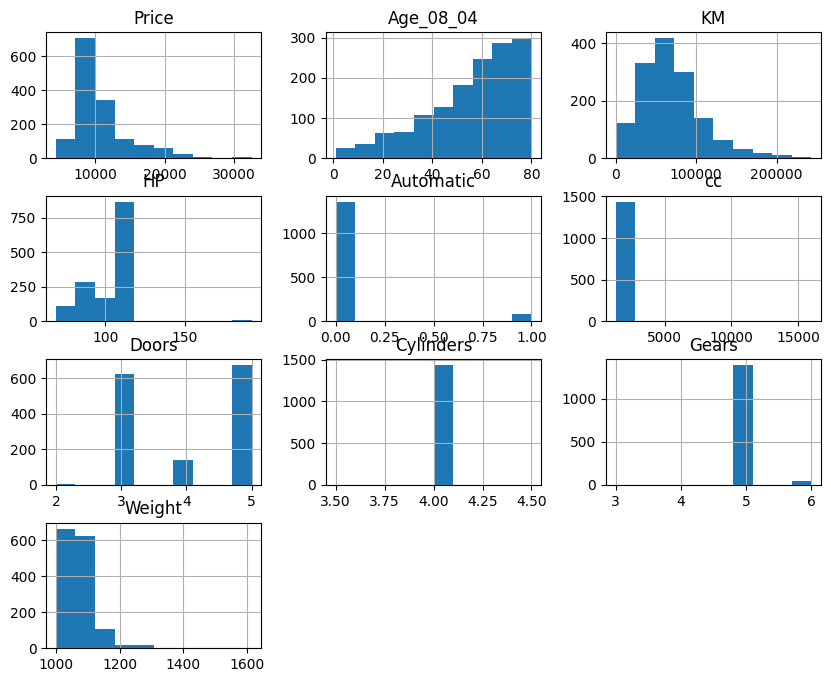

In [9]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
data.hist(figsize=(10, 8))
plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

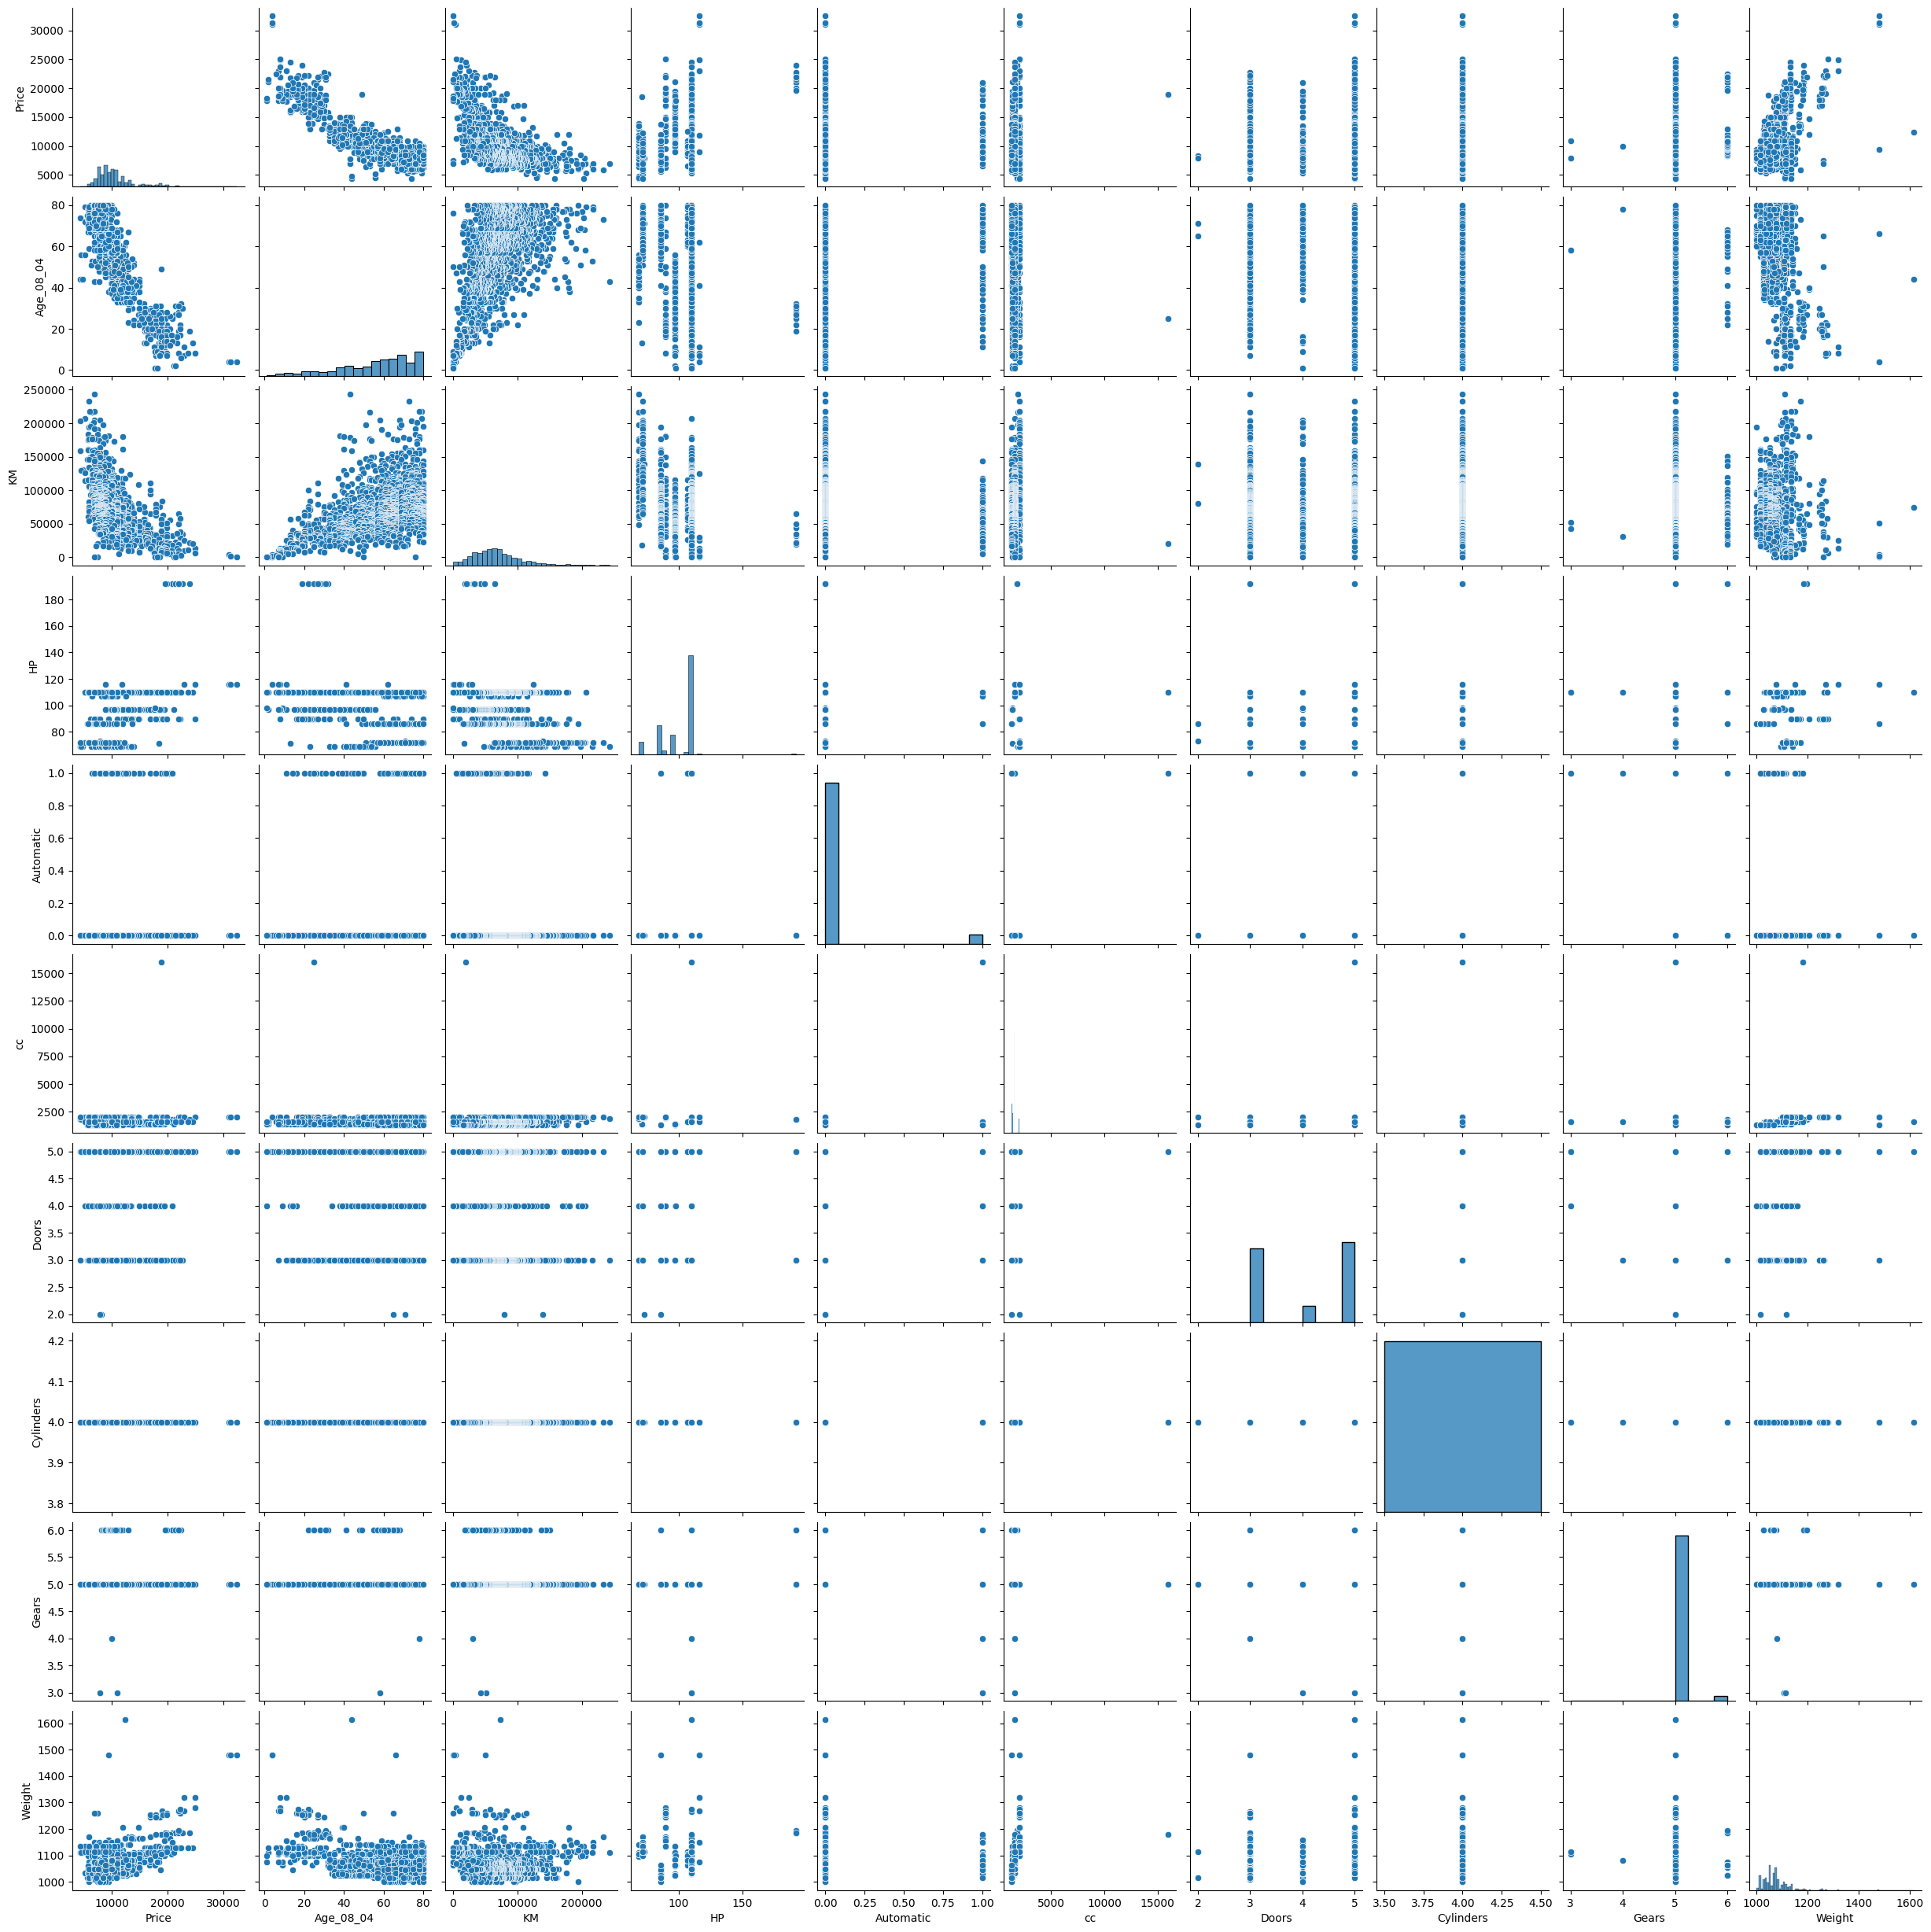

In [11]:
# Data Visualization
sns.pairplot(data)
# Direct relationship is in between WT and VOL.

In [15]:
# Display the column names
print(data.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [19]:
# Select the relevant columns
columns_of_interest = ['Price', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

# Create a new DataFrame with these columns
new_data = data[columns_of_interest]

# Display the new DataFrame
print(new_data.head())

   Price     KM  HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0  13500  46986  90          0  2000      3          4      5    1165
1  13750  72937  90          0  2000      3          4      5    1165
2  13950  41711  90          0  2000      3          4      5    1165
3  14950  48000  90          0  2000      3          4      5    1165
4  13750  38500  90          0  2000      3          4      5    1170


<Axes: >

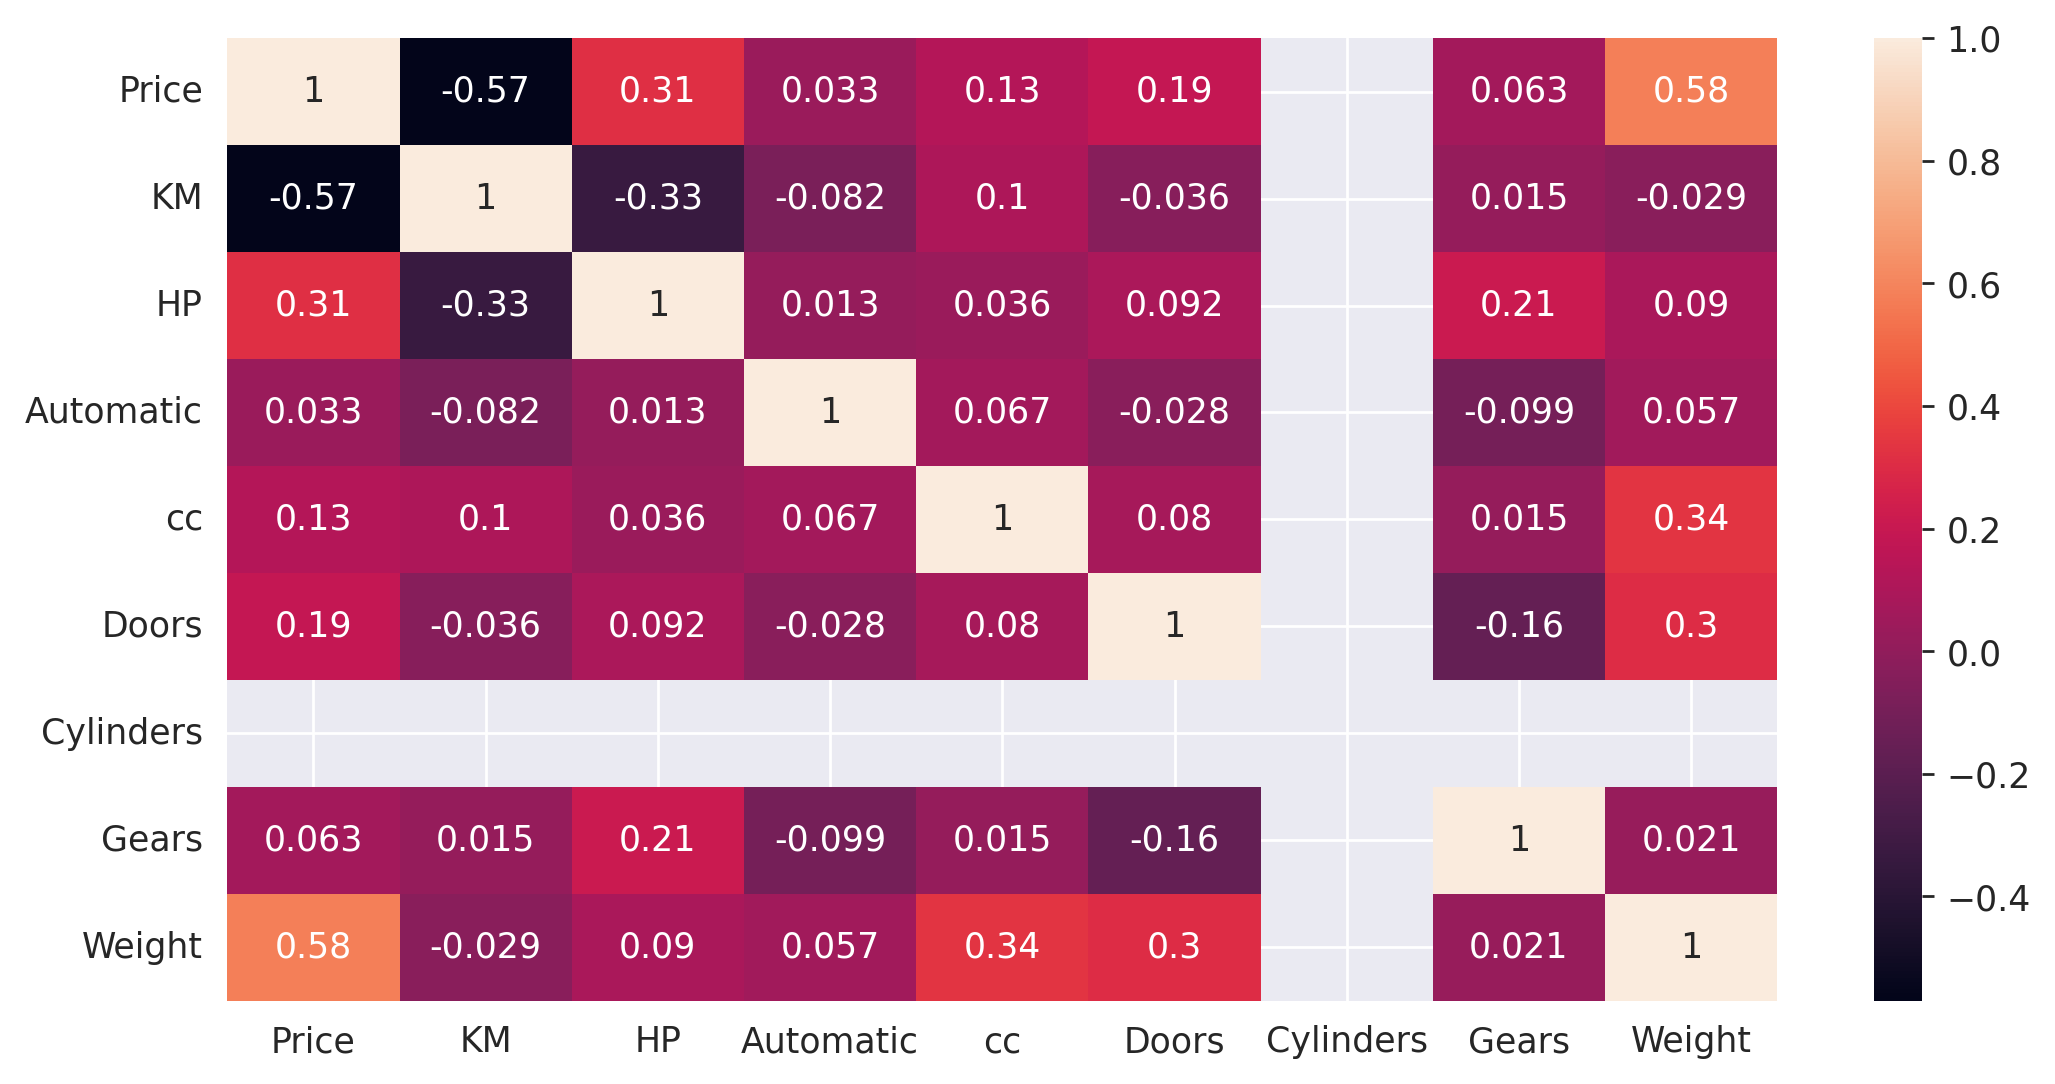

In [21]:
# Confirm correlation with heatmap
sns.heatmap(new_data.corr(),annot=True)
# same perfect 1 relationship i.e. strong positive relationship is present in WT and VOL


In [24]:
model = smf.ols('Price~KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=new_data).fit()

In [25]:
model.pvalues
# WT and VOL p-values are greater than alpha, so accept H0
# H0:slope = 0 so columns are not imp, Ha:m !=0 so columns are important
# HP,SP are important and WT,VOL are not important


,0
Intercept,4.051707e-61
KM,9.413362e-167
HP,2.278763e-06
Automatic,1.214295e-02
cc,5.786817e-01
Doors,6.836012e-01
Cylinders,4.051707e-61
Gears,2.203722e-02
Weight,2.051636e-174


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
new_data.values

array([[13500, 46986,    90, ...,     4,     5,  1165],
       [13750, 72937,    90, ...,     4,     5,  1165],
       [13950, 41711,    90, ...,     4,     5,  1165],
       ...,
       [ 8500, 17016,    86, ...,     4,     5,  1015],
       [ 7250, 16916,    86, ...,     4,     5,  1015],
       [ 6950,     1,   110, ...,     4,     5,  1114]])

In [28]:
vif = pd.DataFrame()
vif

""


In [29]:
vif['Features'] = new_data.columns
vif

,Features
0,Price
1,KM
2,HP
3,Automatic
4,cc
5,Doors
6,Cylinders
7,Gears
8,Weight


In [30]:
range(len(new_data.columns)) # 4 columns 0 to 3

range(0, 9)

In [31]:
[variance_inflation_factor(new_data.values,i) for i in range(len(new_data.columns))]

[2.8968888811395295,
 1.9746717367237758,
 1.230802007784514,
 1.0329522350790894,
 1.1511153711939253,
 1.1554610434622368,
 1374.7155048840912,
 1.113234259166763,
 2.1735380786426157]

In [32]:
vif['VIF'] = [variance_inflation_factor(new_data.values,i) for i in range(len(new_data.columns))]
# in range i will iterate through every column one by one

In [33]:
vif
# check highest VIF values: VOL
# closest VIF value to highest is WT

,Features,VIF
0,Price,2.896889
1,KM,1.974672
2,HP,1.230802
3,Automatic,1.032952
4,cc,1.151115
5,Doors,1.155461
6,Cylinders,1374.715505
7,Gears,1.113234
8,Weight,2.173538


In [35]:
# Consider WT and exclude VOL
wt = smf.ols('Price~KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data = new_data).fit()
wt.rsquared, wt.aic

(0.6548020856061842, 26102.154616699085)

In [36]:
# create final model
model = smf.ols('Price~KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=new_data).fit()
model.rsquared # not a good accuracy only 65%

0.6548020856061842

In [37]:
import statsmodels.api as sm #for Q-Q plot function for error vs predicted

In [38]:
new_data.head()

,Price,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,46986,90,0,2000,3,4,5,1165
1,13750,72937,90,0,2000,3,4,5,1165
2,13950,41711,90,0,2000,3,4,5,1165
3,14950,48000,90,0,2000,3,4,5,1165
4,13750,38500,90,0,2000,3,4,5,1170


In [39]:
model.fittedvalues # predicted values
# for MPG check 1st record: its 53.70 in above output
# In below predicted values for 1st record predicted value is 43.59
# So error is 53-43 = 10

,0
0,15222.793626
1,13893.257850
2,15493.045301
3,15170.843826
4,15852.343429
...,...
1431,11100.110654
1432,10789.632852
1433,10891.278222
1434,10896.401476


In [40]:
model.params
# 43 is predicted using equation: y=m1x1+m2x2+m3x3+c
# y=(0.20)+49(HP)+(-0.20)*89(VOL)+0.40*104(SP) + 29 (intercept)
# so y = 43

,0
Intercept,-1935.339786
KM,-0.051233
HP,19.666511
Automatic,-625.893717
cc,-0.079177
Doors,-25.935461
Cylinders,-7741.359146
Gears,722.157596
Weight,38.958085


In [41]:
model.resid # erro=actual-predicted value

,0
0,-1722.793626
1,-143.257850
2,-1543.045301
3,-220.843826
4,-2102.343429
...,...
1431,-3600.110654
1432,55.367148
1433,-2391.278222
1434,-3646.401476


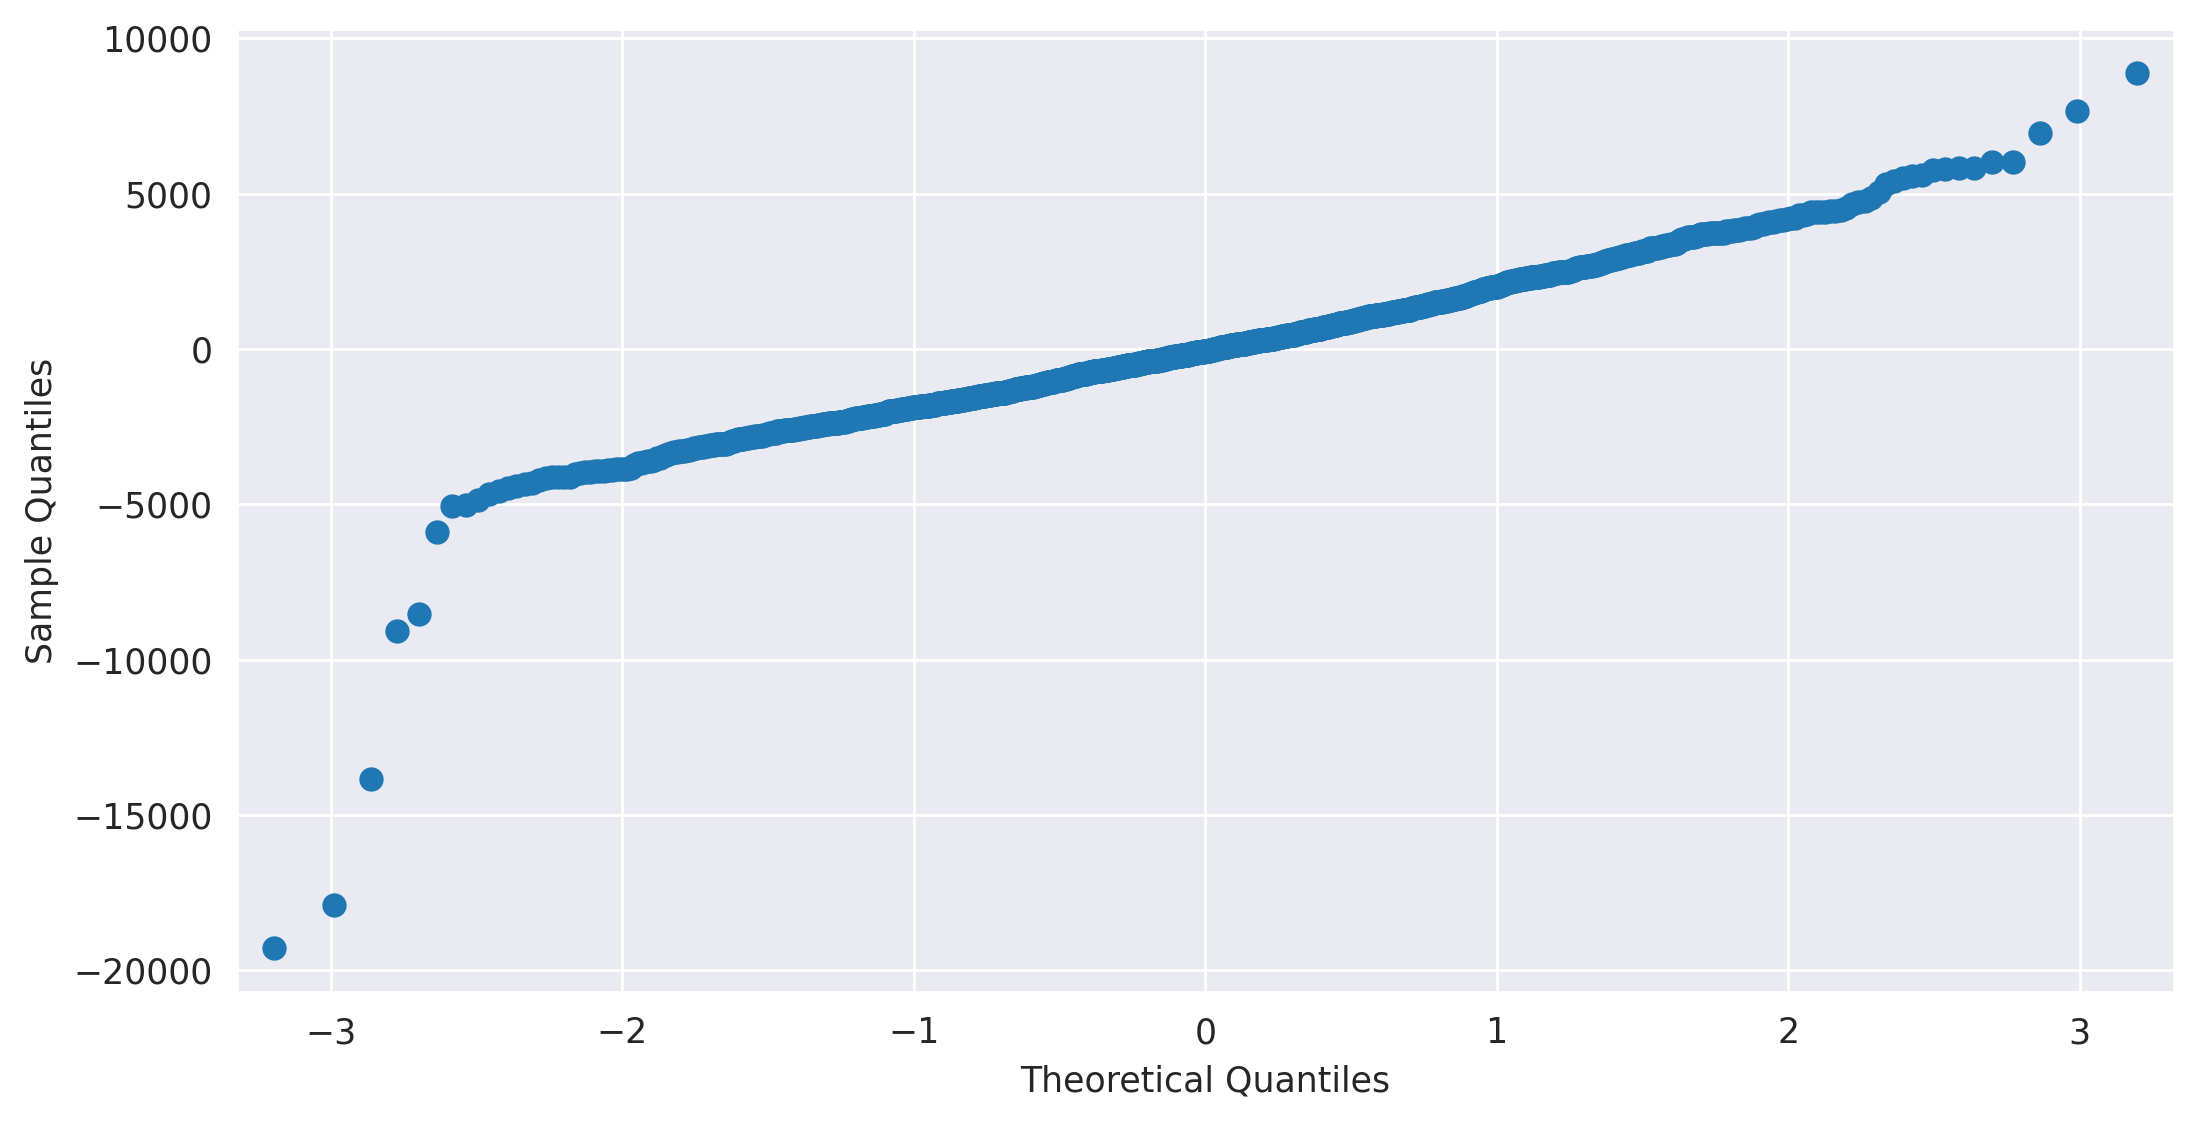

In [42]:
# Q-Q Plot
sm.qqplot(model.resid);

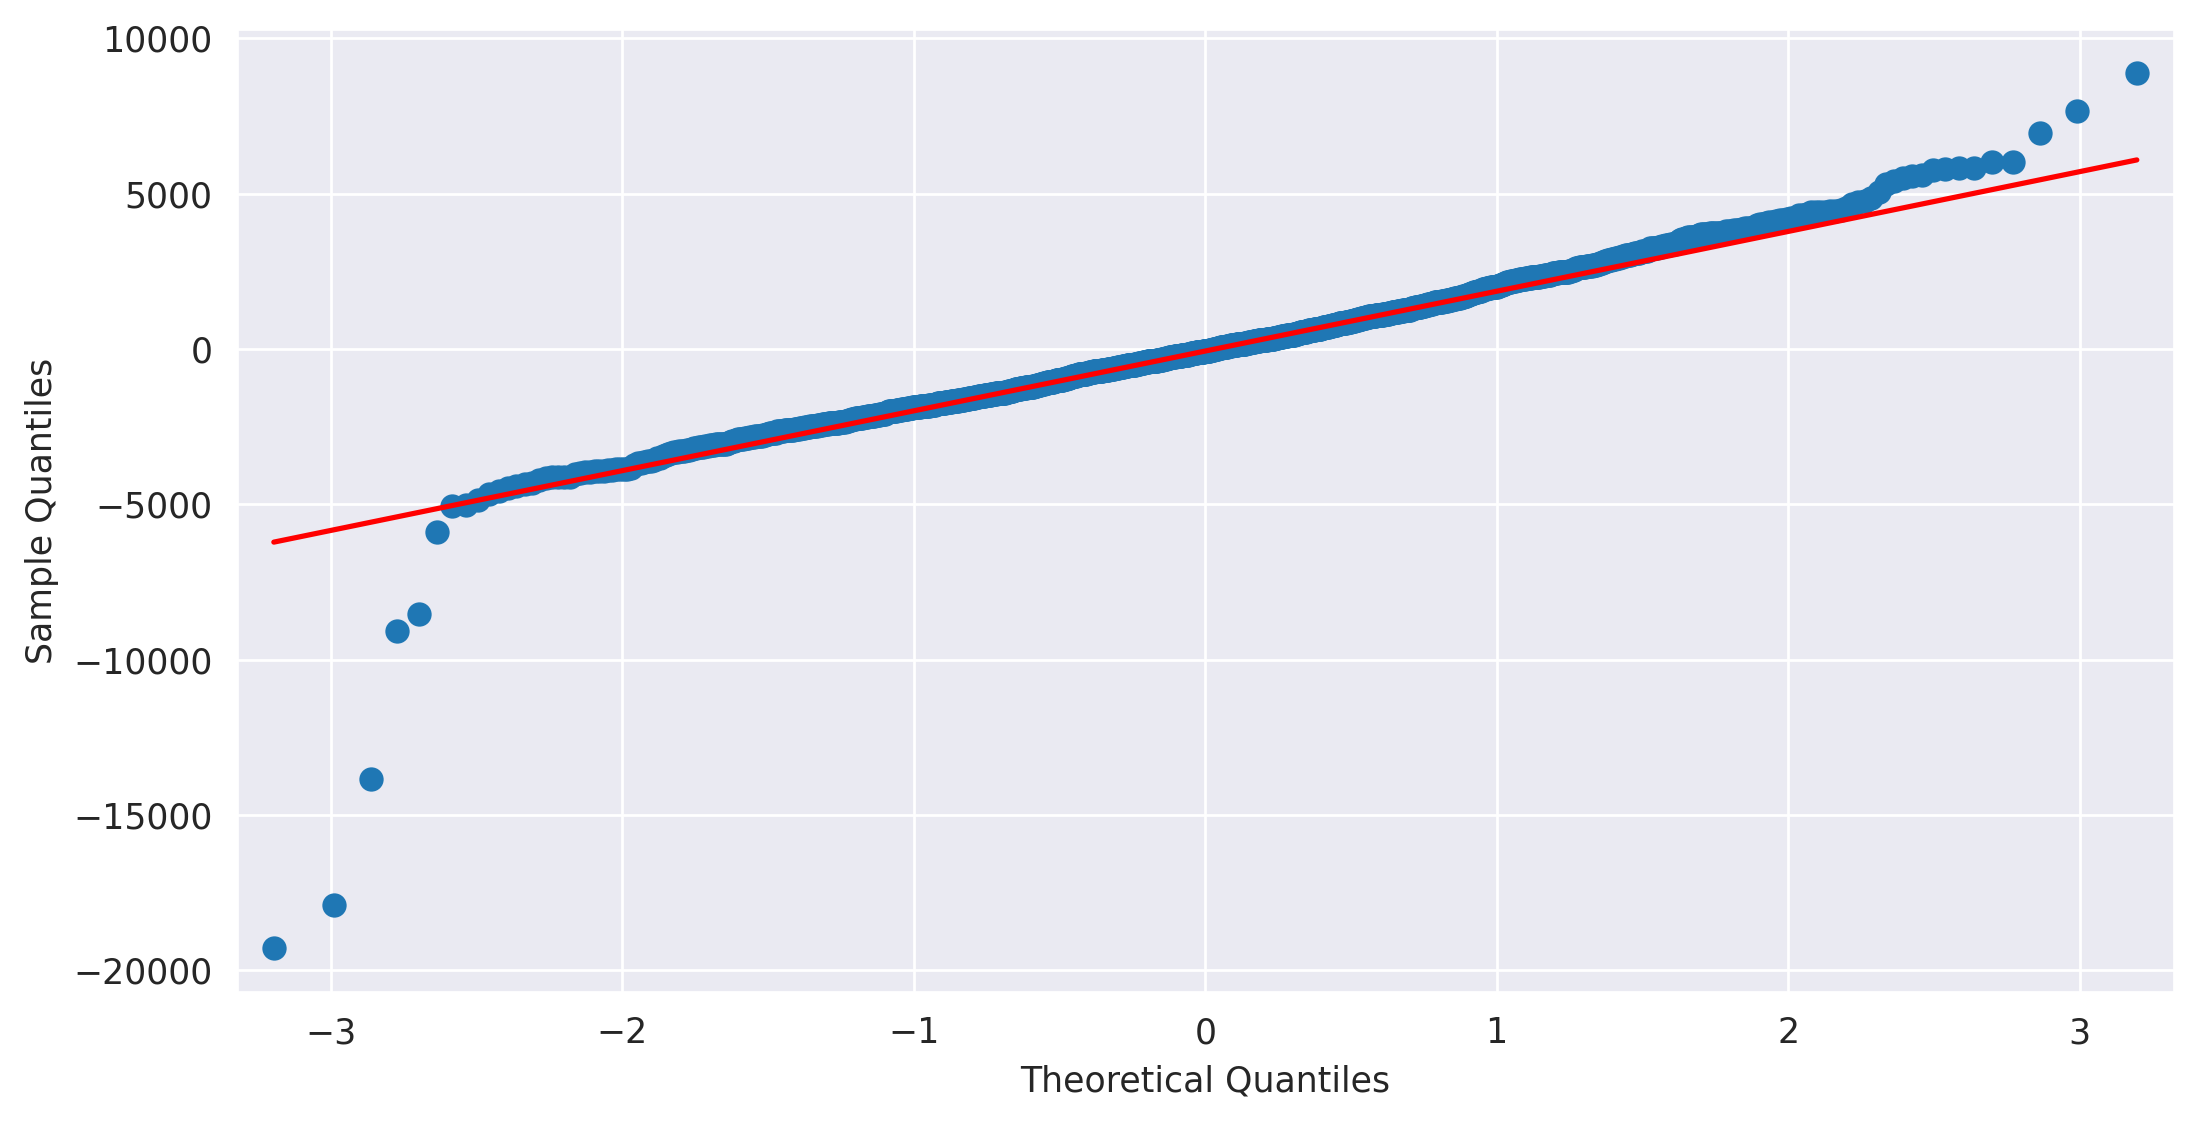

In [43]:
sm.qqplot(model.resid, line='q');
# Data is not following normal distribution

In [44]:
# get index for higher residuals
np.argmax(model.resid),np.max(model.resid)
# argmax() finds max error value and returns its index, max() will return max error

(147, 8884.432929697163)

# 2. Residual plot of Homoscedasticity

In [45]:
model.params

,0
Intercept,-1935.339786
KM,-0.051233
HP,19.666511
Automatic,-625.893717
cc,-0.079177
Doors,-25.935461
Cylinders,-7741.359146
Gears,722.157596
Weight,38.958085


In [46]:
model.fittedvalues

,0
0,15222.793626
1,13893.257850
2,15493.045301
3,15170.843826
4,15852.343429
...,...
1431,11100.110654
1432,10789.632852
1433,10891.278222
1434,10896.401476


In [47]:
model.resid

,0
0,-1722.793626
1,-143.257850
2,-1543.045301
3,-220.843826
4,-2102.343429
...,...
1431,-3600.110654
1432,55.367148
1433,-2391.278222
1434,-3646.401476


Text(0, 0.5, 'Errors')

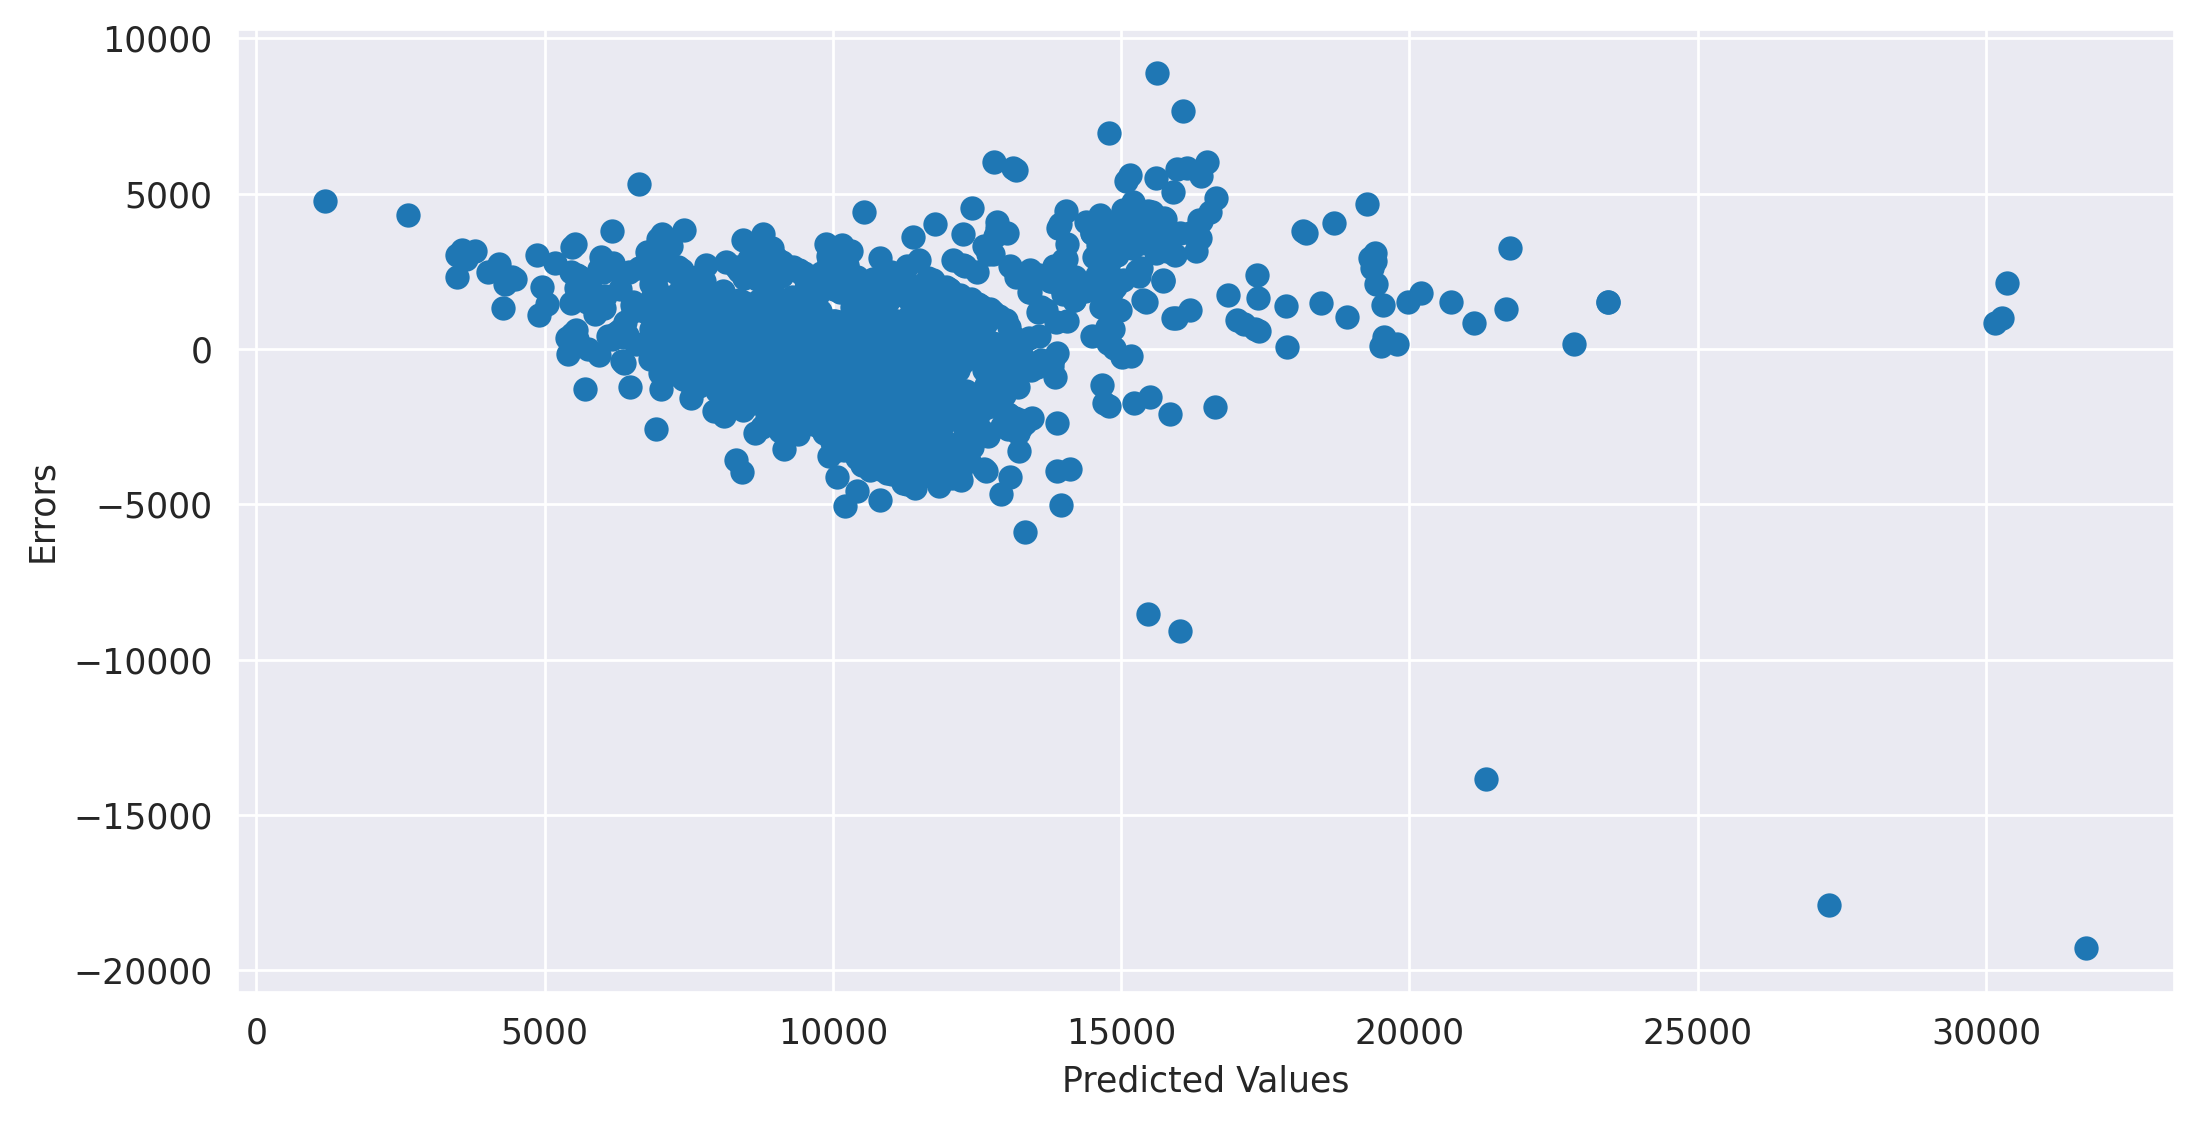

In [48]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
# pattern is there

#3. Residual Vs. Regressor (x)

In [49]:
new_data.columns

Index(['Price', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')

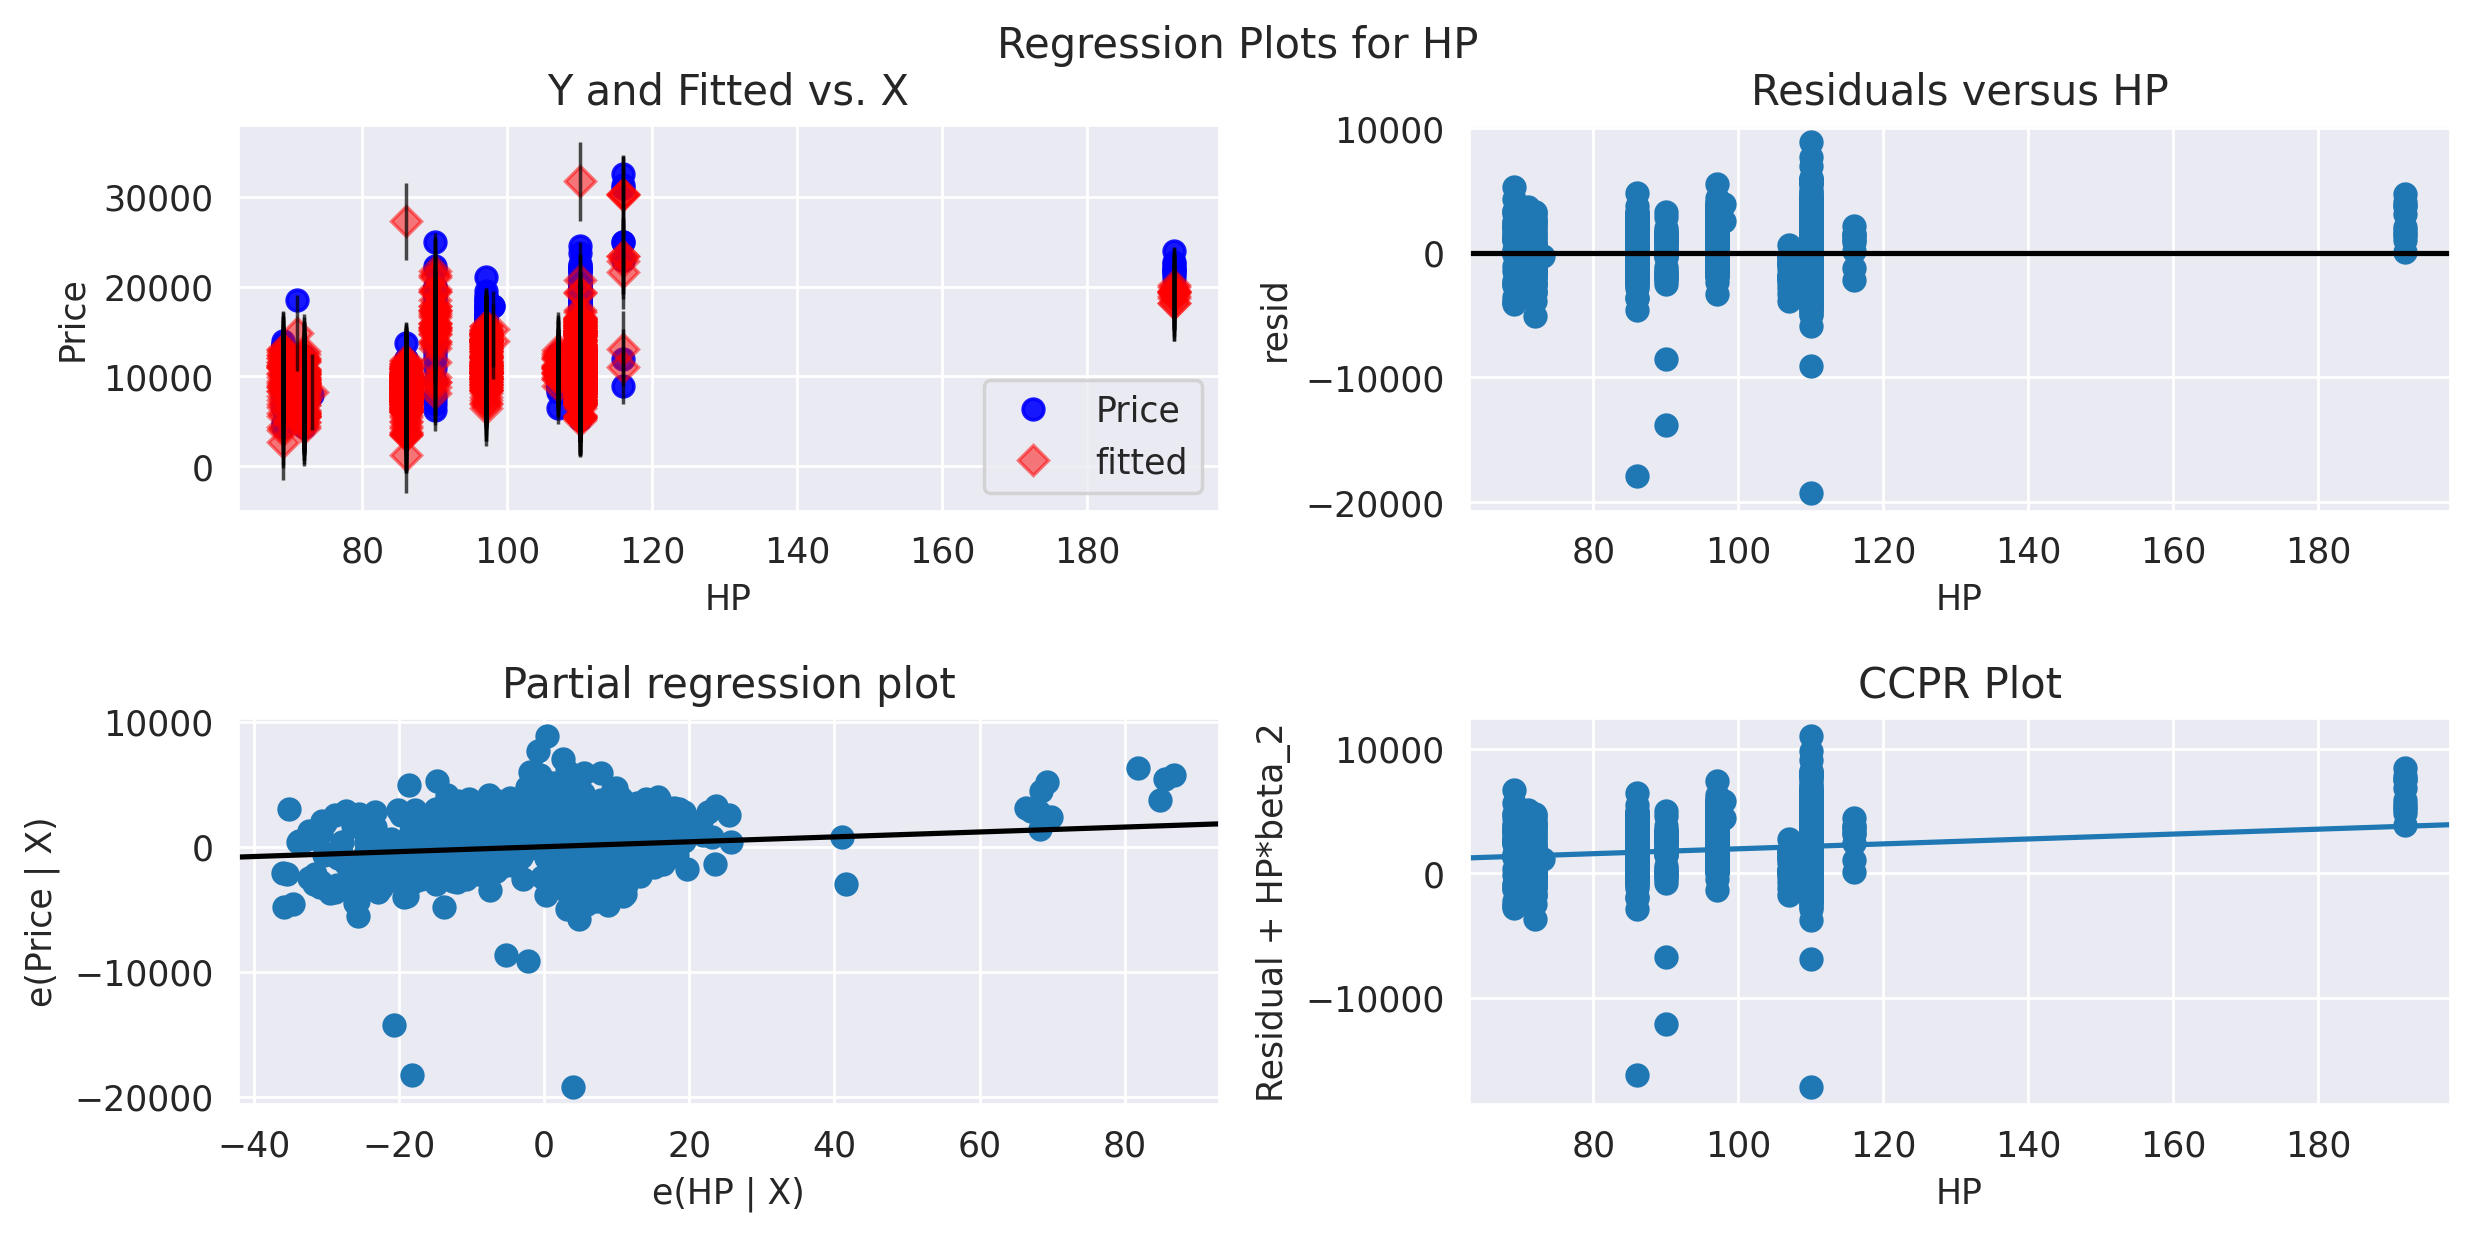

In [51]:
# VOL
sm.graphics.plot_regress_exog(model,'HP');

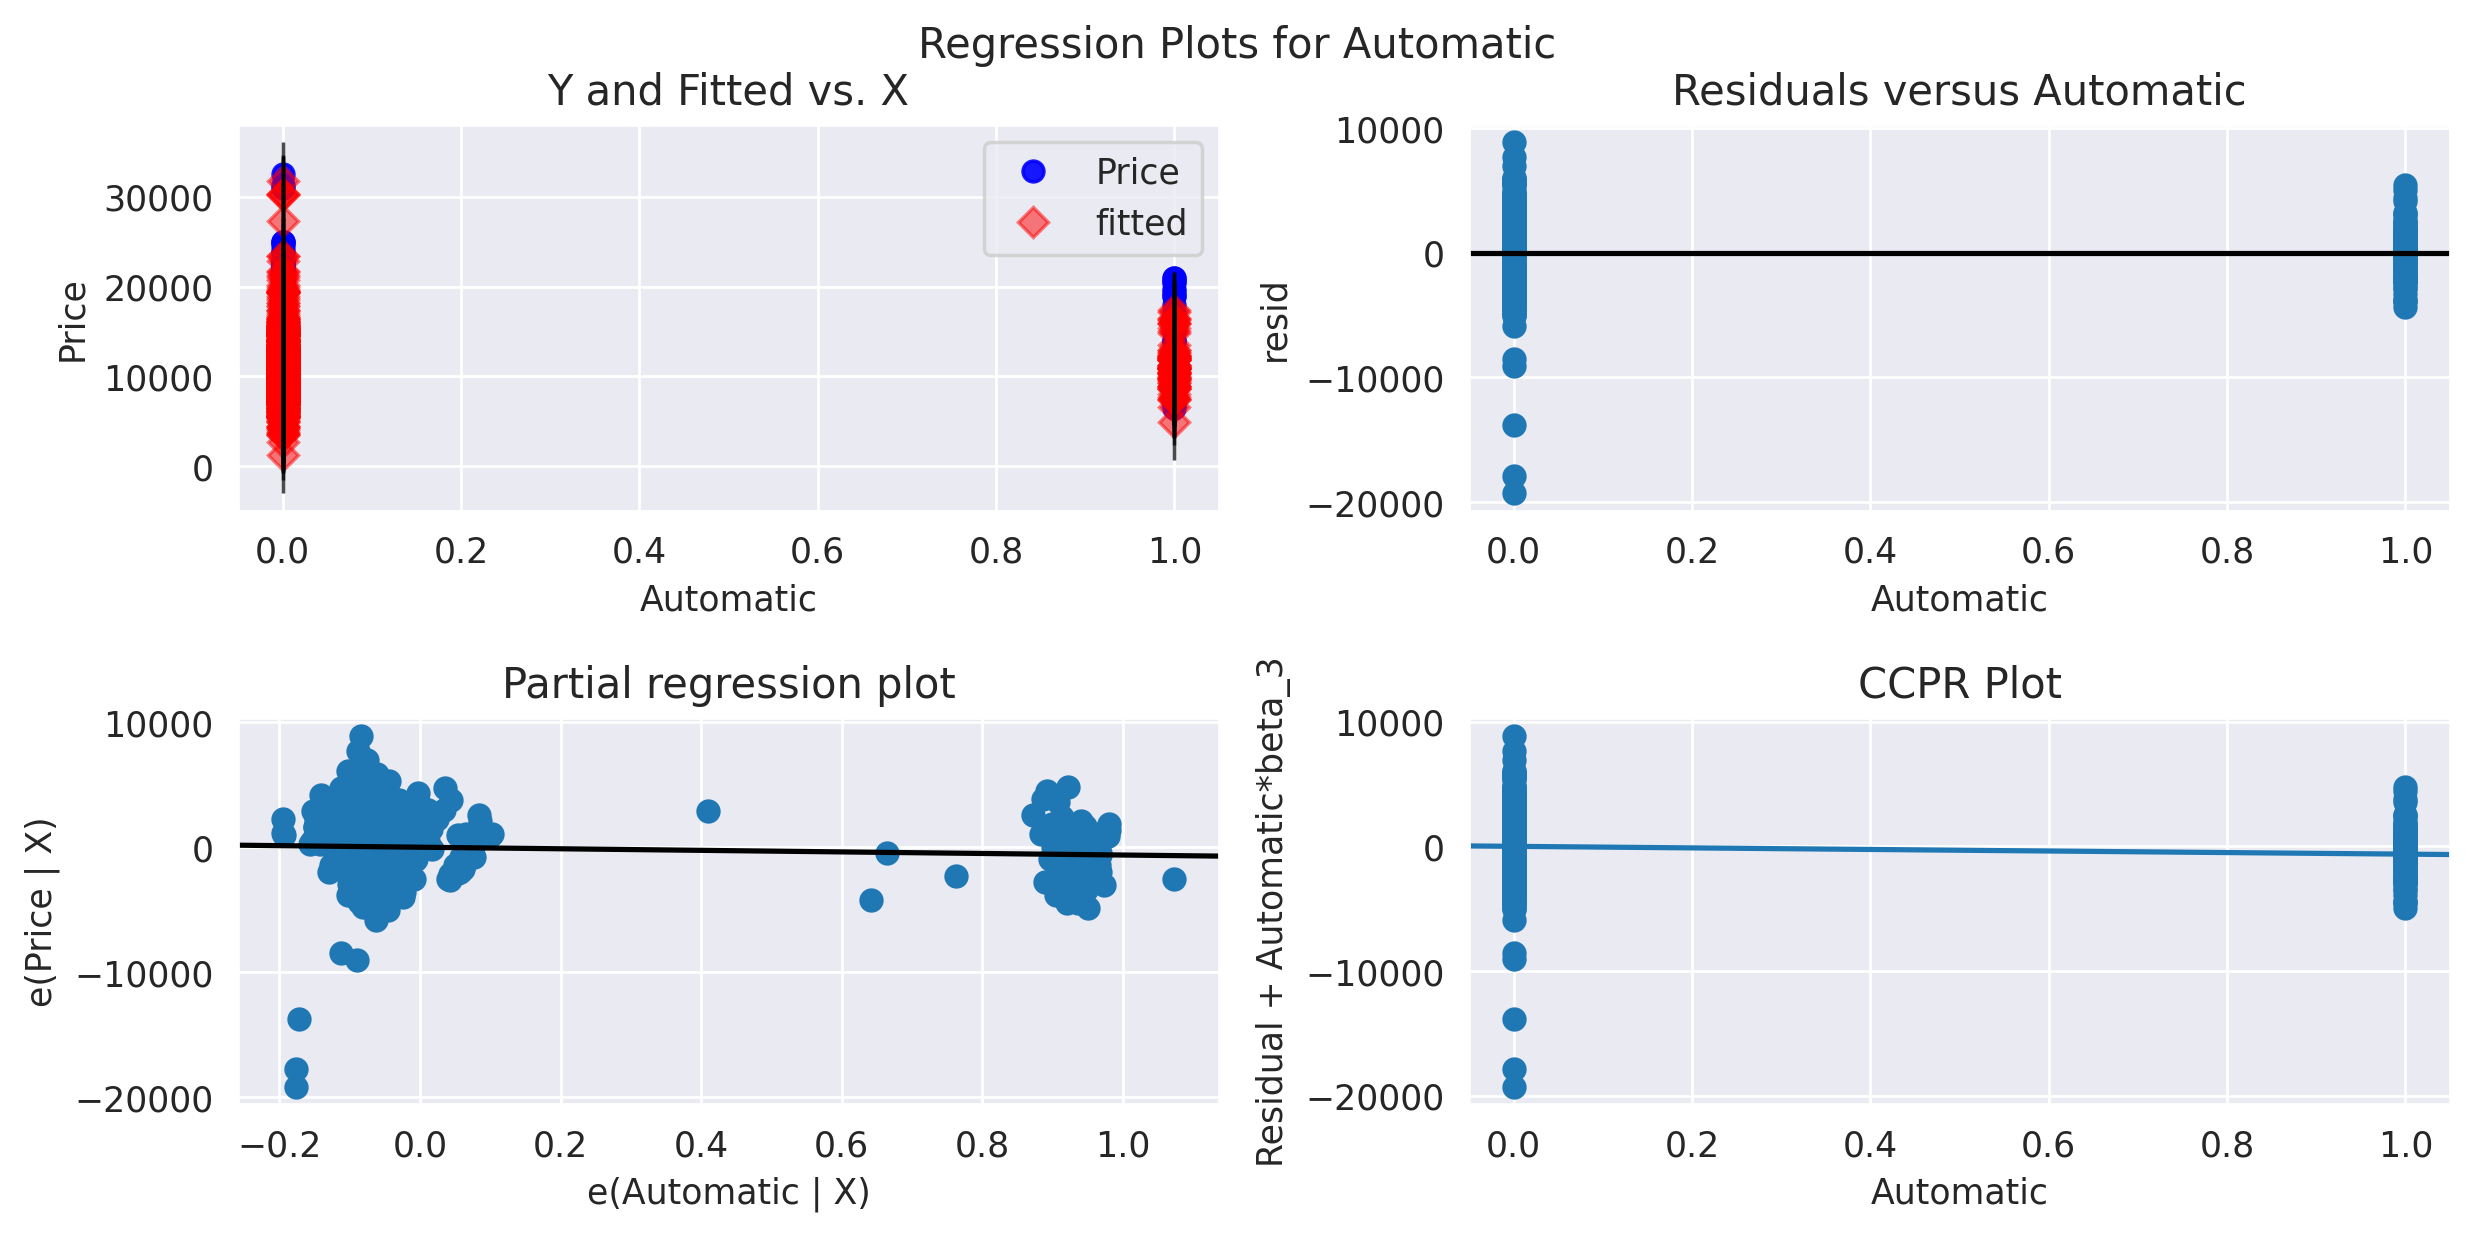

In [52]:
# VOL
sm.graphics.plot_regress_exog(model,'Automatic');

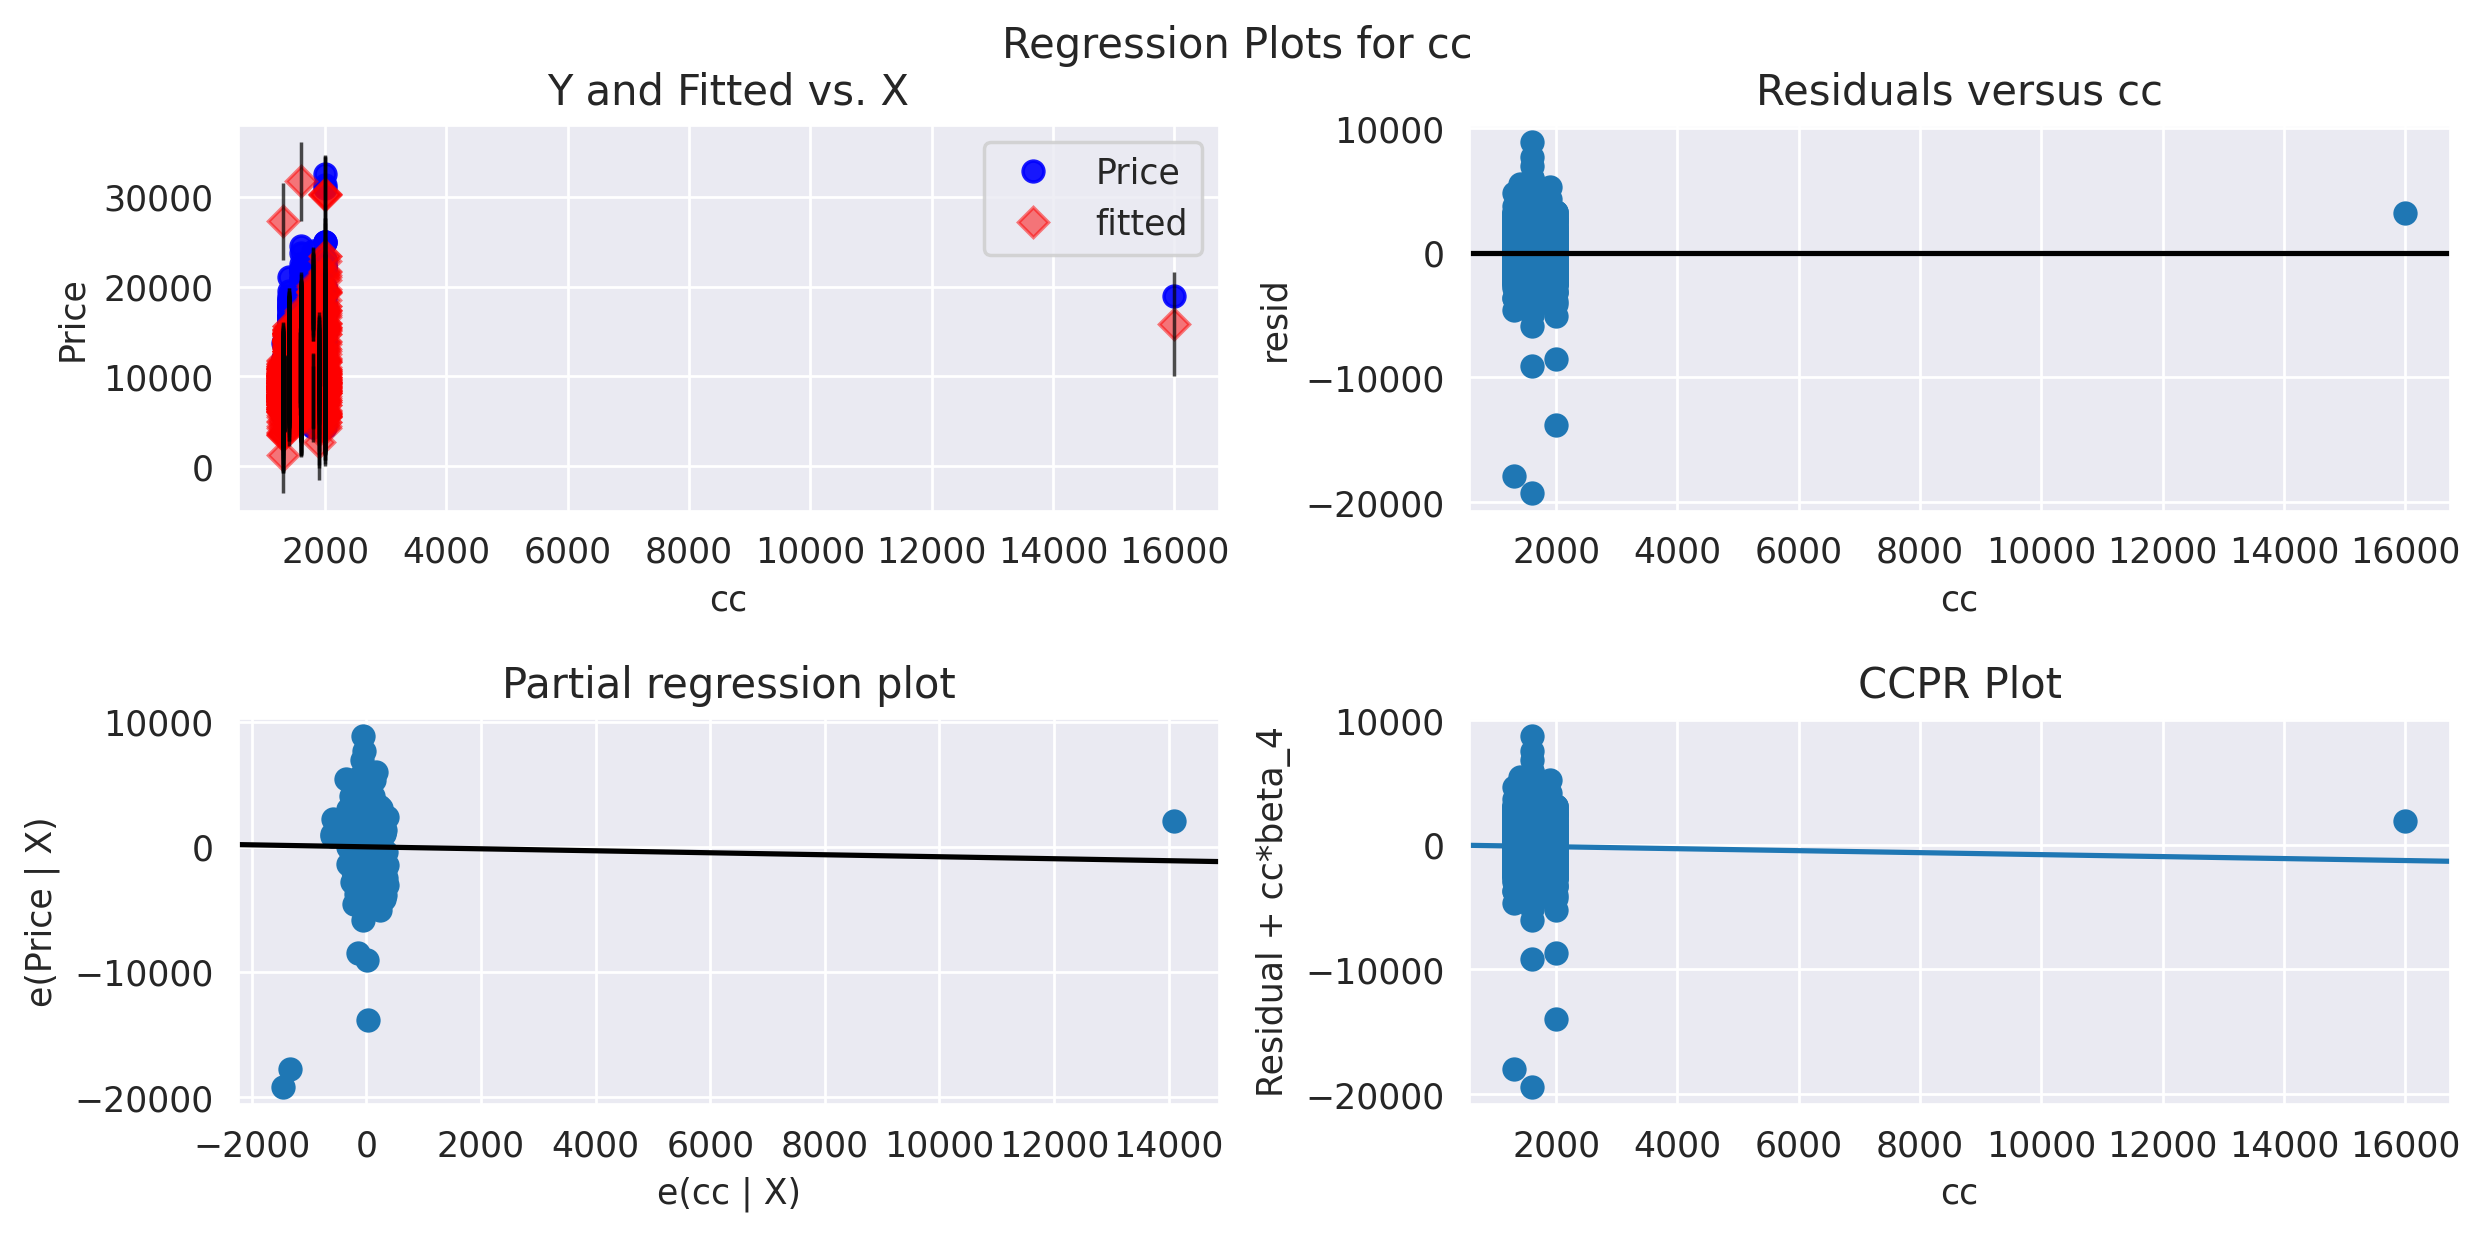

In [53]:
# VOL
sm.graphics.plot_regress_exog(model,'cc');

# MODEL DELETION TECHNIQUES

In [54]:
model

In [55]:
# find the influence data
inf = model.get_influence() # in statsmodels get_inluence() will do the calculations

In [56]:
# calculate the cook's distance
c,p = inf.cooks_distance # returns 81 cook's distances and 81 p values. Only consider cook's distance

In [57]:
c

array([4.61426351e-04, 2.87308692e-06, 3.83301524e-04, ...,
       6.93846774e-04, 1.61577911e-03, 7.94003665e-03])

Text(0, 0.5, "Cook's Distance")

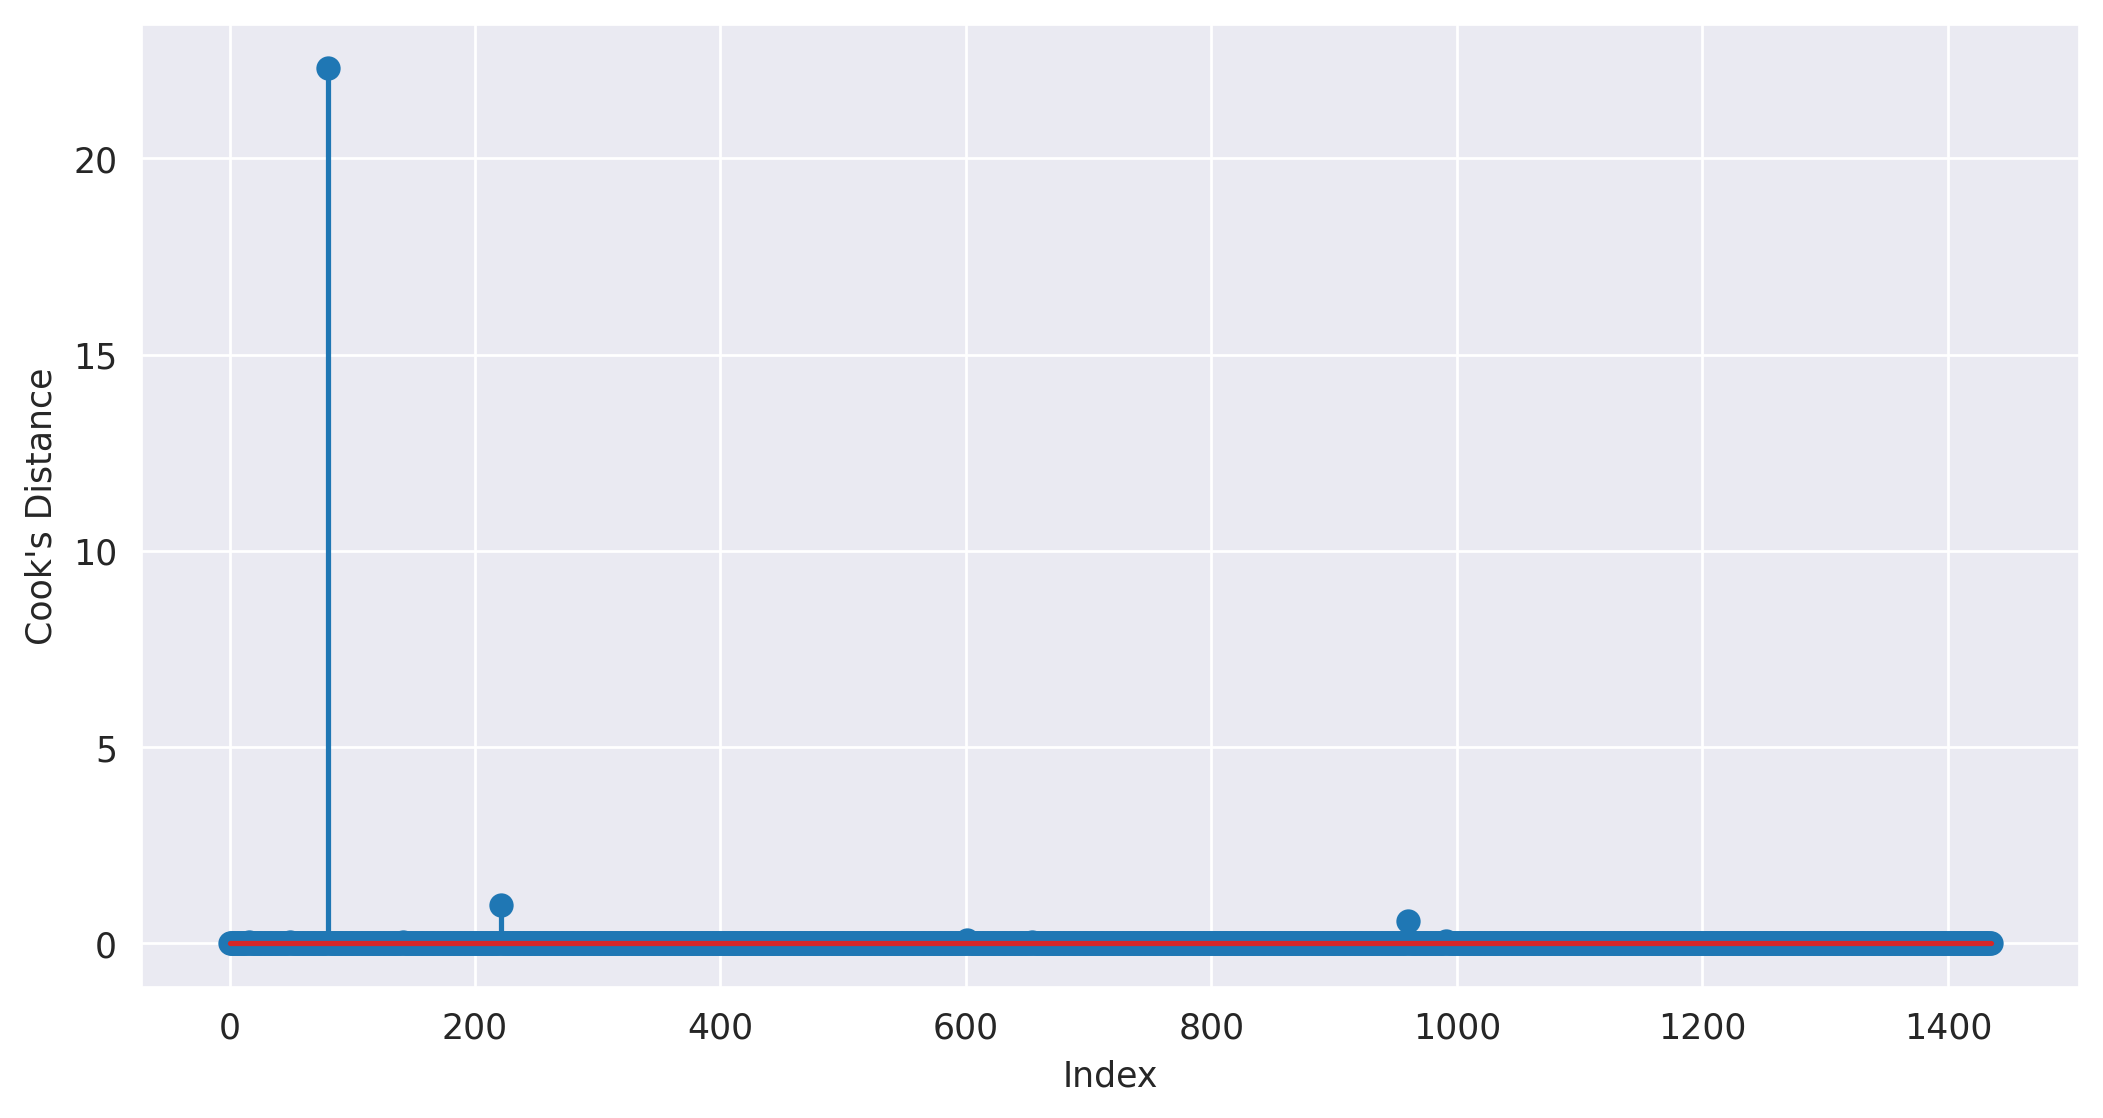

In [58]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')

In [59]:
np.argmax(c), np.max(c) # row 76 is influencer so drop it

(80, 22.30237467051422)

In [60]:
new_data.iloc[[76]]

,Price,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
76,18750,25266,110,0,1600,5,4,5,1130


In [61]:
# Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

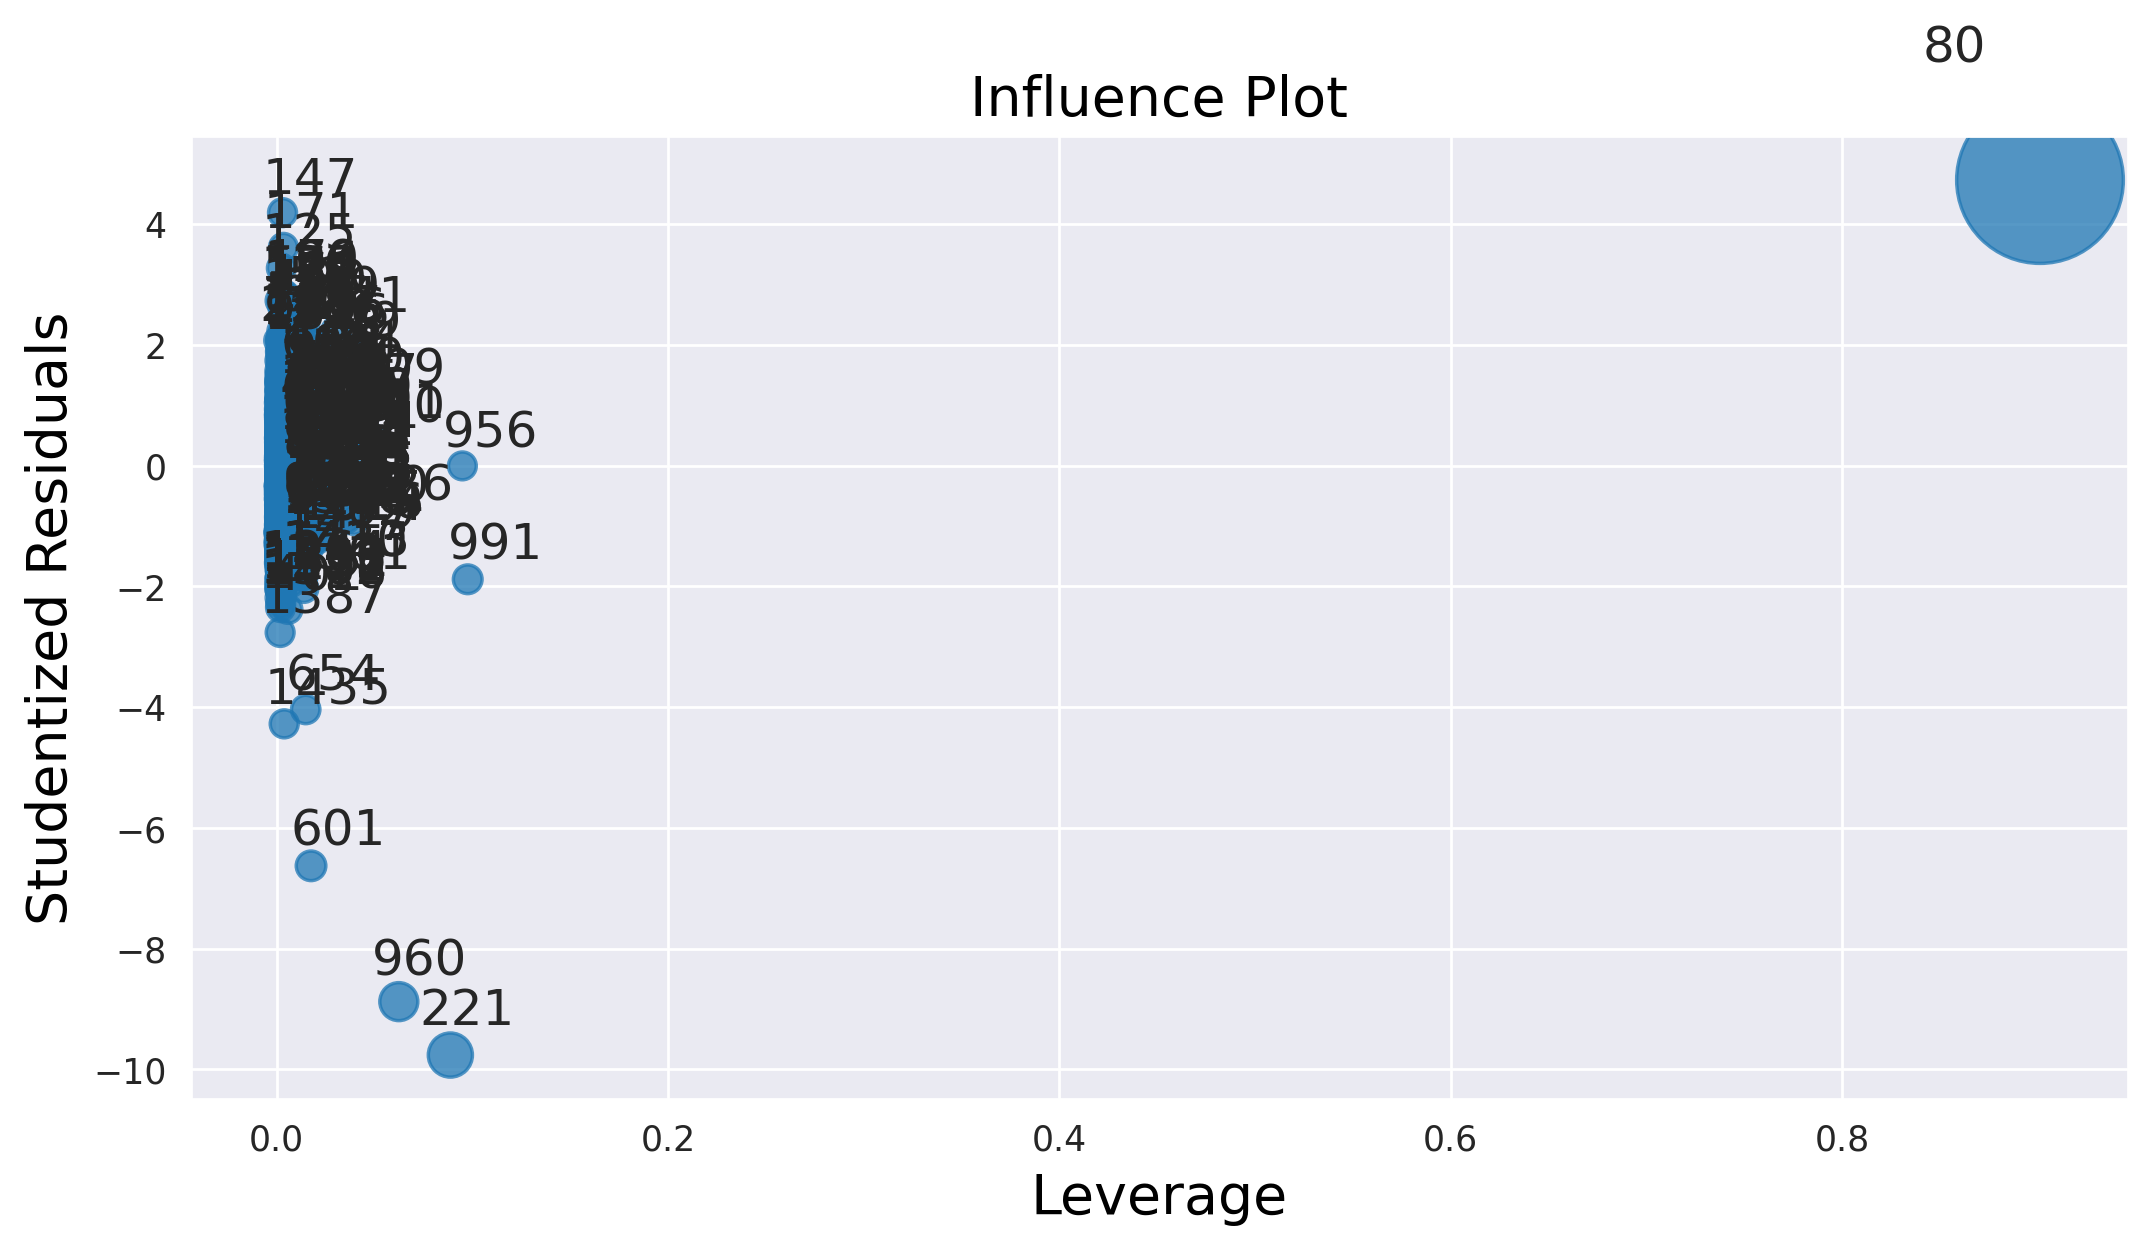

In [62]:
influence_plot(model);

In [64]:
# Calculate cutoff
k = len(new_data.columns) # 5
n = len(new_data) # 81

leverage = 3 * (k + 1) / n
leverage

0.020891364902506964

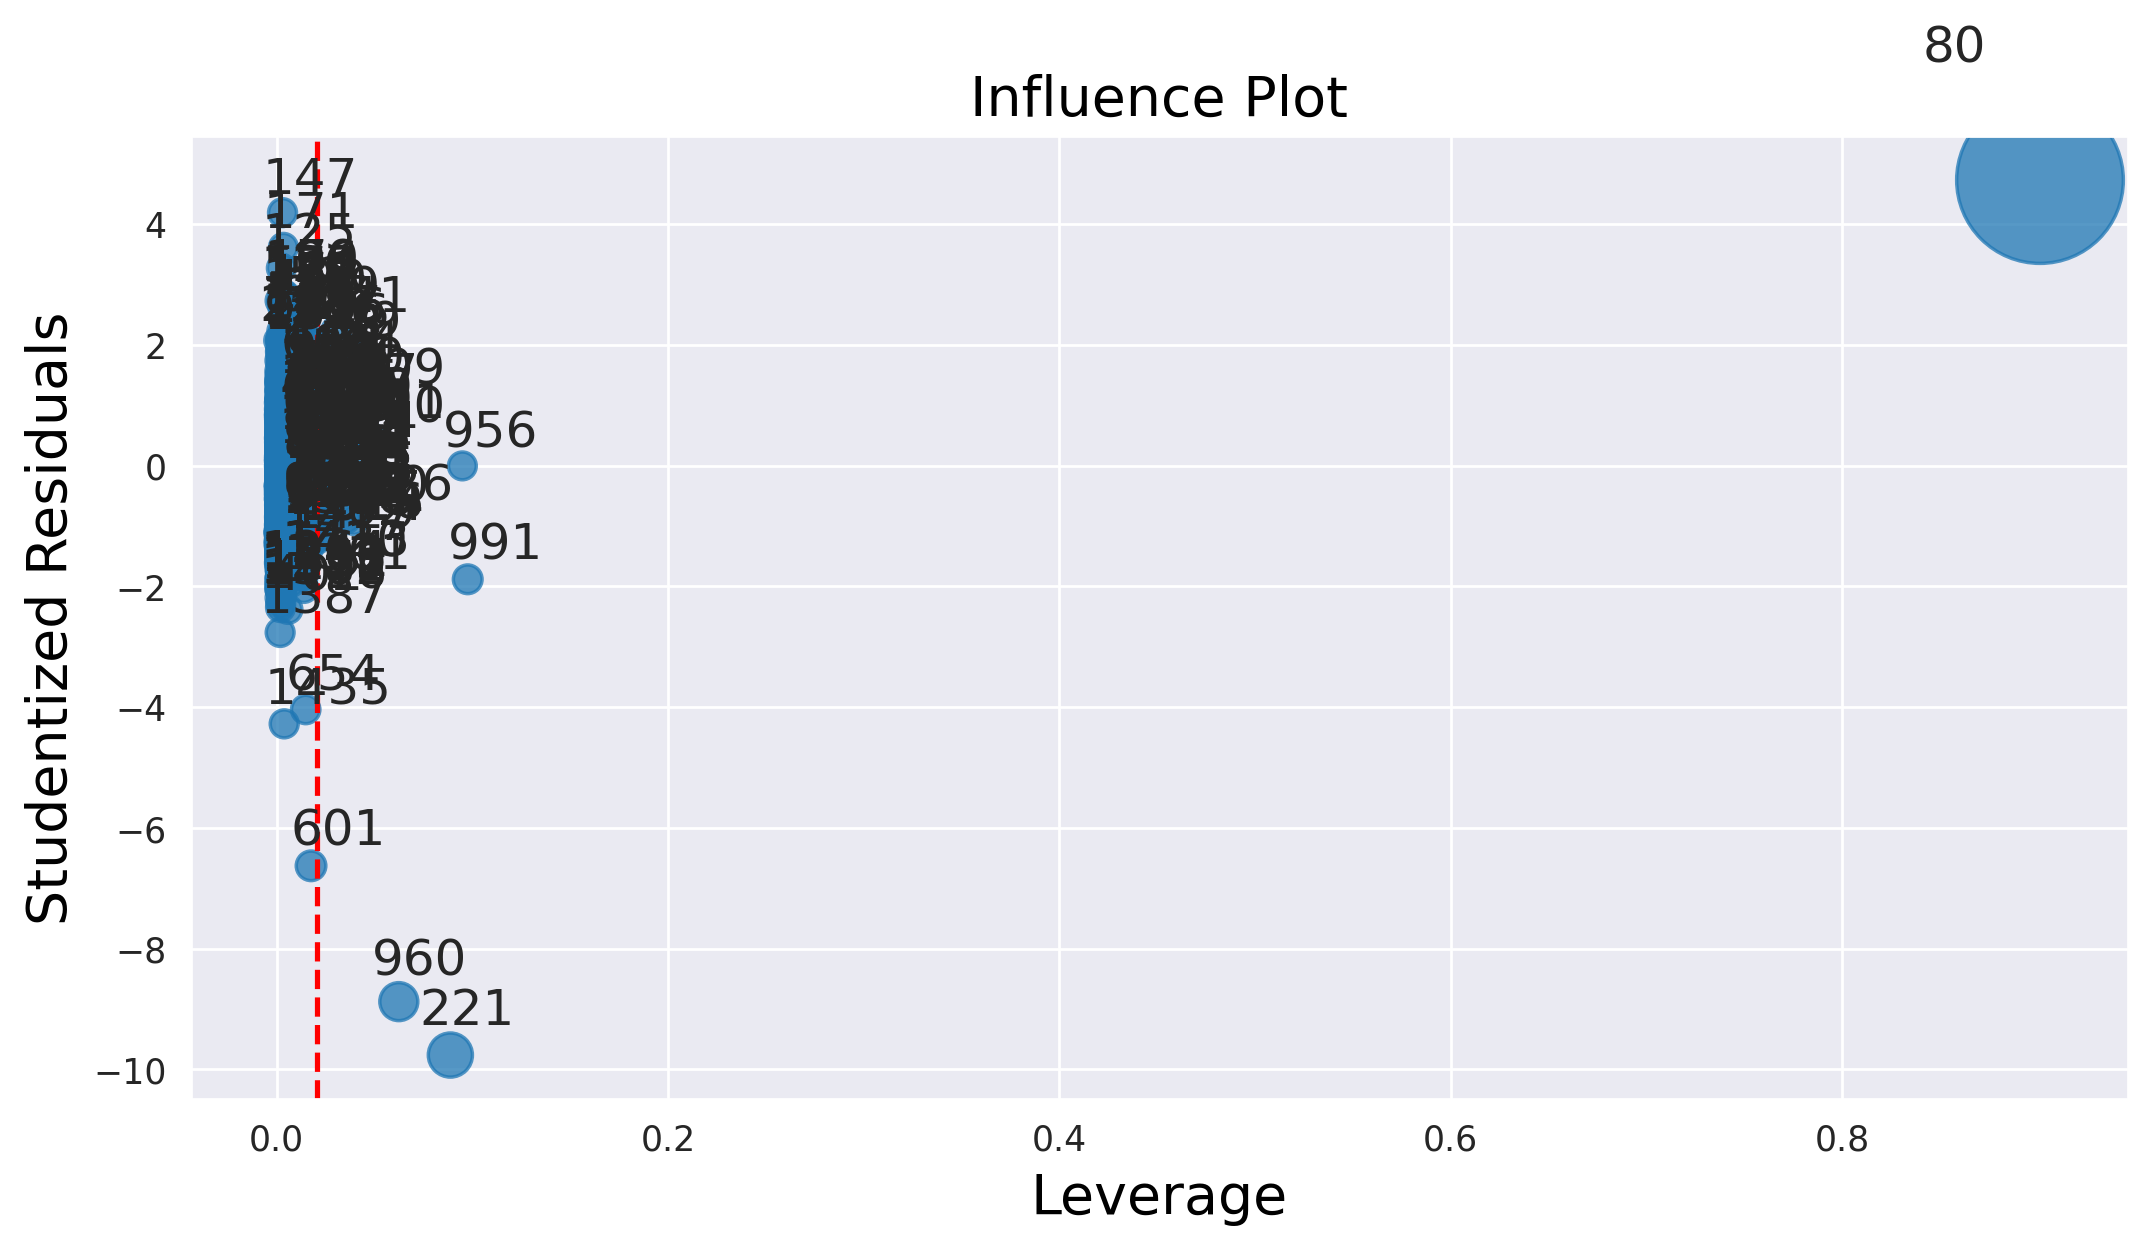

In [65]:

influence_plot(model)
plt.axvline(leverage, linestyle = '--', color = 'red')
# axvline: axis vertical line to draw a vertical line

In [66]:
new_data.drop(index=76,inplace=True) # drop 76th record

In [72]:
final_model = smf.ols('Price~KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=new_data).fit()

In [67]:
new_data.head()

,Price,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,46986,90,0,2000,3,4,5,1165
1,13750,72937,90,0,2000,3,4,5,1165
2,13950,41711,90,0,2000,3,4,5,1165
3,14950,48000,90,0,2000,3,4,5,1165
4,13750,38500,90,0,2000,3,4,5,1170


In [68]:
test = pd.DataFrame({
    'KM':[56,53.62,95],
    'Automatic':[92.6,85.63,75],
    'Doors':[110,112,150]
})

In [69]:
test

,KM,Automatic,Doors
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [73]:
final_model.params

,0
Intercept,-1933.043528
KM,-0.051164
HP,19.652276
Automatic,-622.118944
cc,-0.078174
Doors,-27.621923
Cylinders,-7732.174112
Gears,723.258687
Weight,38.915938


In [74]:
test

,KM,Automatic,Doors
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150
